# Proyecto: Análisis Exploratorio de Datos - calidad de vinos

In [2]:
#MILTON TARSIAN GARCIA PAYERO
#Analitica Descriptiva I
# 2020 - 10676


#Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de datos

In [9]:
#Cargamos cada csv y lo guardamos en una variable
red = pd.read_csv('winequality-red.csv', delimiter=";")
white = pd.read_csv('winequality-white.csv', delimiter=";")
# Carga las primeras 5 filas de ambos DataFrames.
red.head(5)
white.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Combina ambos DataFrames 

In [12]:
#Agregamos una nueva columna para identifica nuestros datos de cada data frame la columna es category y el identificador sera
# sera white y red
red['category']='red'
red.head()
white['category']='white'
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [15]:
#Utilizamos pandas para crear un nuevo dataframe 
total_wine=red.append(white, ignore_index=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_22940\3271090467.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_wine=red.append(white, ignore_index=True)


In [16]:
#Ver si la concatenacion de los datos ue correcta
total_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


# Exploración inicial de los datos y validación


In [17]:
#Buscamos la cantidad de filas y columnas en nuestro datafame
np.shape(total_wine)
print("Filas: " + str(total_wine.shape[0]))
print("Columnas: " + str(total_wine.shape[1]))

Filas: 6497
Columnas: 13


In [18]:
# Vamos a ver los tipos de variable que tiene nuestro dataframe que vamos a utilizar la funcion info()
total_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  category              6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [19]:
#Vamos a utlizar  la  funcion describe para ver nuestras datas descriptivas del dataset
total_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [21]:
#Vamos a crear una variable donde almacenemos los valores de la columna quality
quality = total_wine['quality']
print("Valor de la moda: " + str(quality.mode()))
print("Valor de la media: " + str(quality.mean()))
print("Valor de la mediana: " + str(quality.median()))
print("Valor Maximo: " + str(quality.max()))
print("Valor Minimo: " + str(quality.min()))
quality

Valor de la moda: 0    6
Name: quality, dtype: int64
Valor de la media: 5.818377712790519
Valor de la mediana: 6.0
Valor Maximo: 9
Valor Minimo: 3


0       5
1       5
2       5
3       6
4       5
       ..
6492    6
6493    5
6494    6
6495    7
6496    6
Name: quality, Length: 6497, dtype: int64

In [22]:
#En este paso vamos a contar los valoes de la vaiable  quality
np.unique(quality, return_counts=True)

(array([3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([  30,  216, 2138, 2836, 1079,  193,    5], dtype=int64))

<BarContainer object of 7 artists>

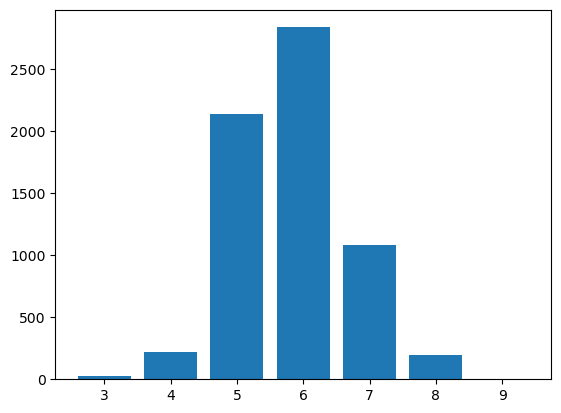

In [31]:
values, distibucion = np.unique(quality , return_counts = True)
plt.bar(values, distibucion)

# Categorización de la variable target

Text(0.5, 1.0, 'Distribucion de la calidad de vino')

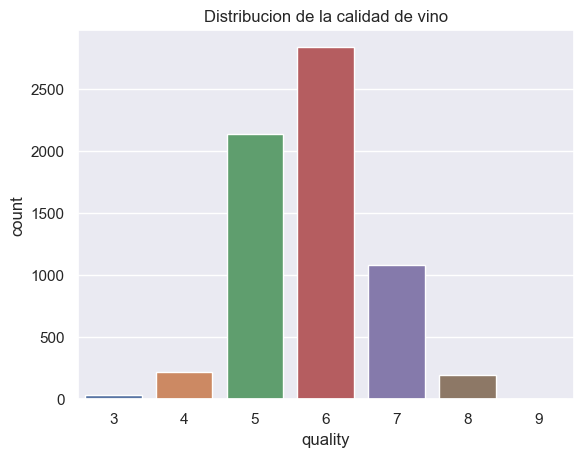

In [32]:
# Vamos a crear un rafico tipo countplot de la variable quality para ver la cantidad de cada valor de calidad
sns.set_theme(style = 'darkgrid')
sns.countplot(x = 'quality' , data = total_wine)
plt.title('Distribucion de la calidad de vino')

In [35]:
""" Vamos a utilizar la  función lambda con las condiciones necesarias para agregar una columna al DataFrame donde se 
indique la categoría de calidad: 'Poor', 'Medium', 'High'.
"""
total_wine['quality_cateory'] = total_wine['quality'].apply(lambda x: 'High' if x>=7 else 'Medium' if x==6 else 'Poor')
total_wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category,quality_category,quality_cateory
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,Medium,Medium
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,Poor,Poor
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,Medium,Medium
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,High,High
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white,Medium,Medium


In [37]:
# Ahora vamos a redefinir el tipo de variable de la nueva columna como tipo category
df_otliers = (total_wine  - total_wine.median()) / total_wine.std()
total_wine.quality_category = total_wine.quality_category.astype('category')
total_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         6497 non-null   float64 
 1   volatile acidity      6497 non-null   float64 
 2   citric acid           6497 non-null   float64 
 3   residual sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free sulfur dioxide   6497 non-null   float64 
 6   total sulfur dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   int64   
 12  category              6497 non-null   object  
 13  quality_category      6497 non-null   category
 14  quality_cateory       6497 non-null   object  
dtypes: c

C:\Users\DELL\AppData\Local\Temp\ipykernel_22940\3534893855.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_otliers = (total_wine  - total_wine.median()) / total_wine.std()
C:\Users\DELL\AppData\Local\Temp\ipykernel_22940\3534893855.py:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_otliers = (total_wine  - total_wine.median()) / total_wine.std()


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


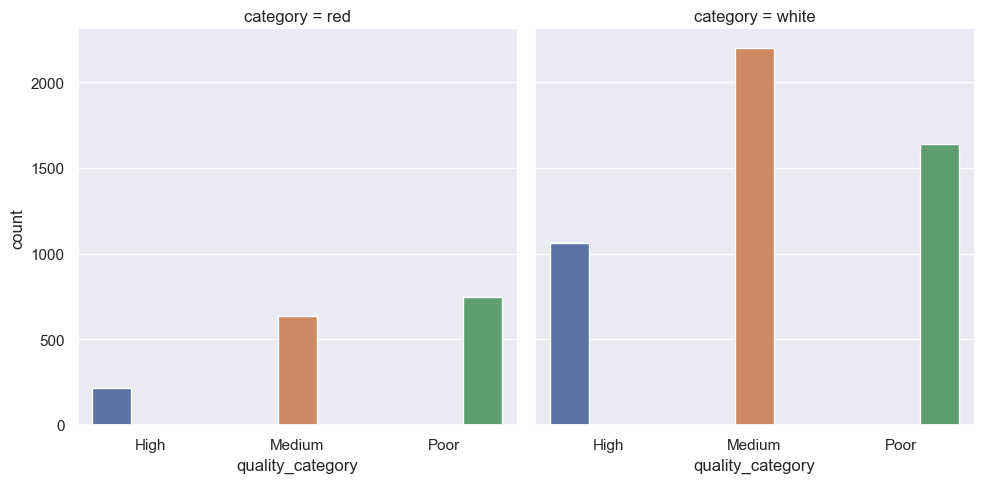

In [38]:
# Vamos a crear una grafica para visualiza el conteo de datos en cada una de las categorias de calidad del vino
sns.set_theme(style= 'darkgrid')
sns.catplot (x= "quality_category", hue = "quality_category" , col = "category", kind ="count", data = total_wine)

# Manejo de outliers

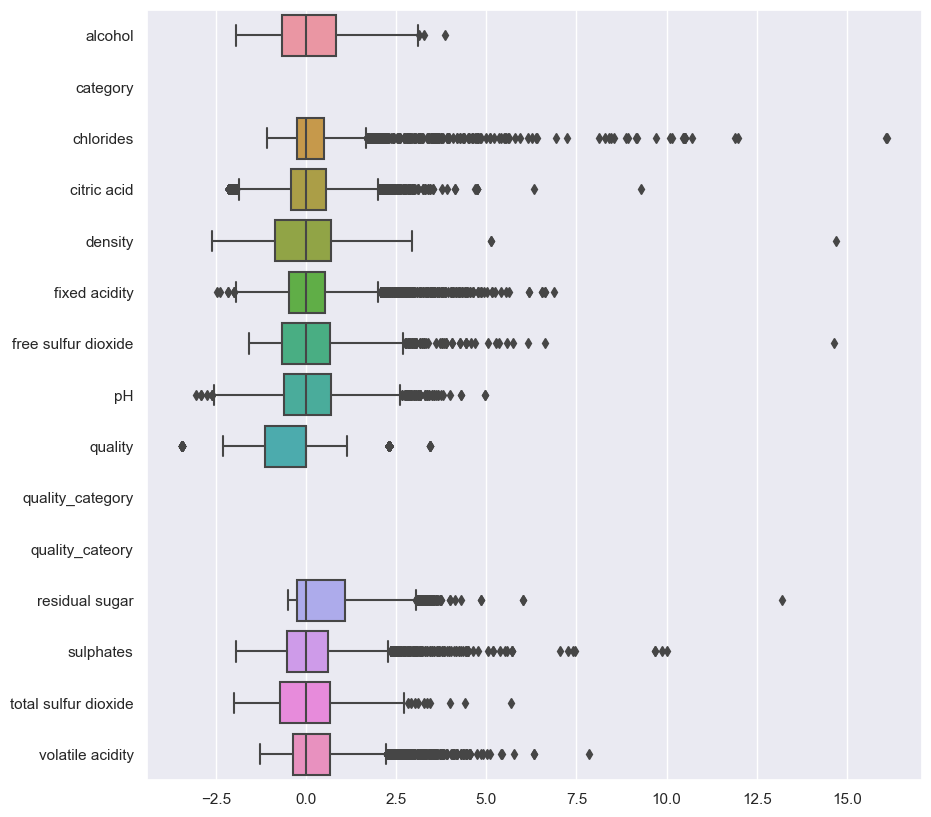

In [42]:
#Utiliza el metodo que veas mas conveniente para dectetar outliers en tu dataset
plt.figure(figsize=(10,10))
sns.boxplot(data =df_otliers , dodge =True , orient = 'h')
plt.title = ('Distribución de los outliers por cada categoria')

# Analisis de correlación entre variables

In [43]:
#Vamos a crear una matriz de correlacion de las variables numericas del dataset
wine_correlation = total_wine.corr()
wine_correlation

C:\Users\DELL\AppData\Local\Temp\ipykernel_22940\1113854868.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  wine_correlation = total_wine.corr()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


C:\Users\DELL\AppData\Local\Temp\ipykernel_22940\3397531816.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(total_wine.corr(), annot = True ,cmap = 'coolwarm', linewidths = 5 , linecolor = 'black', vmin = 0.5 , vmax = 1 , cbar  = True)


TypeError: 'str' object is not callable

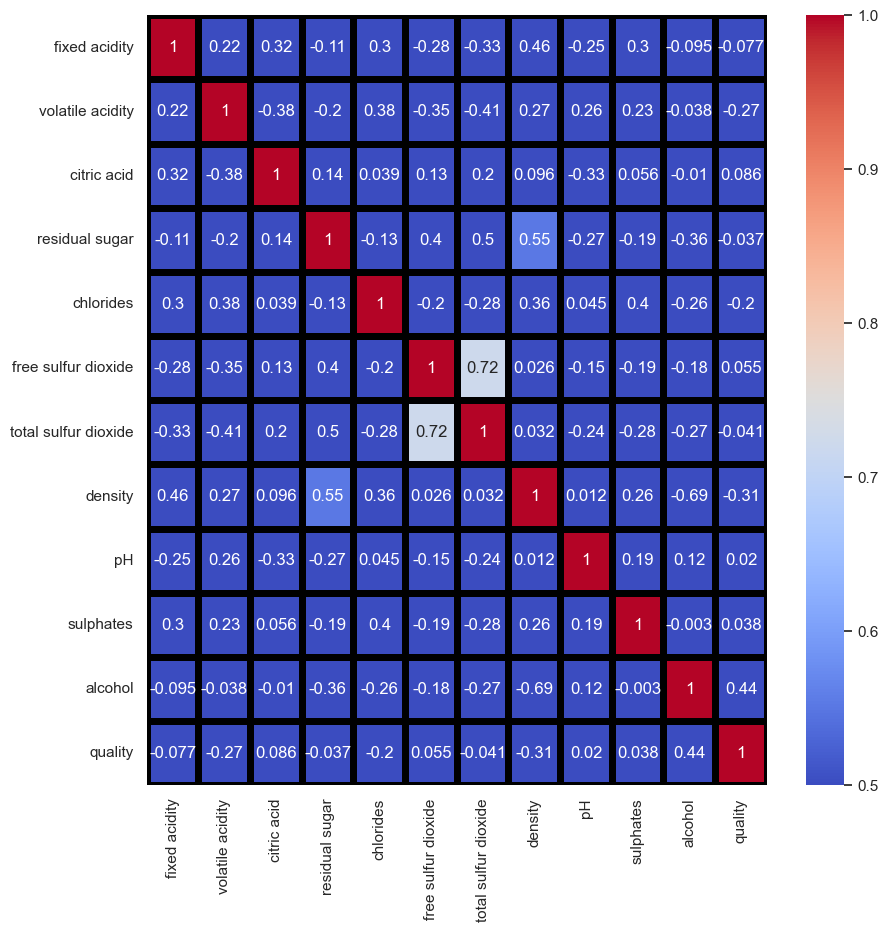

In [46]:
#Vamos a crear un grafico tipo heatmap para observar mejor las correlaciones entre variables
plt.figure(figsize=(10,10))
sns.heatmap(total_wine.corr(), annot = True ,cmap = 'coolwarm', linewidths = 5 , linecolor = 'black', vmin = 0.5 , vmax = 1 , cbar  = True)
plt.title("Mapa de Calor de correlacion de las variable")

In [47]:
#Vamos a mostar una tabla con los valoresde correlacion de cada variable con la variable quality
total_wine.corr()[['quality']].sort_values (by='quality' , ascending = False)

C:\Users\DELL\AppData\Local\Temp\ipykernel_22940\2103088178.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  total_wine.corr()[['quality']].sort_values (by='quality' , ascending = False)


,quality
quality,1.000000
alcohol,0.444319
citric acid,0.085532
free sulfur dioxide,0.055463
sulphates,0.038485
pH,0.019506
residual sugar,-0.036980
total sulfur dioxide,-0.041385
fixed acidity,-0.076743
chlorides,-0.200666


In [48]:
"""
Vamos a crear graficas que consideres para ver la correlacion que exista 
entre las variables que tiene mayorr correlacion con la variable quality
"""
total_wine_qcorr = total_wine[["fixed acidity", "chlorides","alcohol","citric acid",'quality','category','quality_category']]
total_wine_qcorr.head()


,fixed acidity,chlorides,alcohol,citric acid,quality,category,quality_category
0,7.4,0.076,9.4,0.00,5,red,Poor
1,7.8,0.098,9.8,0.00,5,red,Poor
2,7.8,0.092,9.8,0.04,5,red,Poor
3,11.2,0.075,9.8,0.56,6,red,Medium
4,7.4,0.076,9.4,0.00,5,red,Poor


In [49]:
total_wine_qcorr.describe()

,fixed acidity,chlorides,alcohol,citric acid,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.056034,10.491801,0.318633,5.818378
std,1.296434,0.035034,1.192712,0.145318,0.873255
min,3.800000,0.009000,8.000000,0.000000,3.000000
25%,6.400000,0.038000,9.500000,0.250000,5.000000
50%,7.000000,0.047000,10.300000,0.310000,6.000000
75%,7.700000,0.065000,11.300000,0.390000,6.000000
max,15.900000,0.611000,14.900000,1.660000,9.000000


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


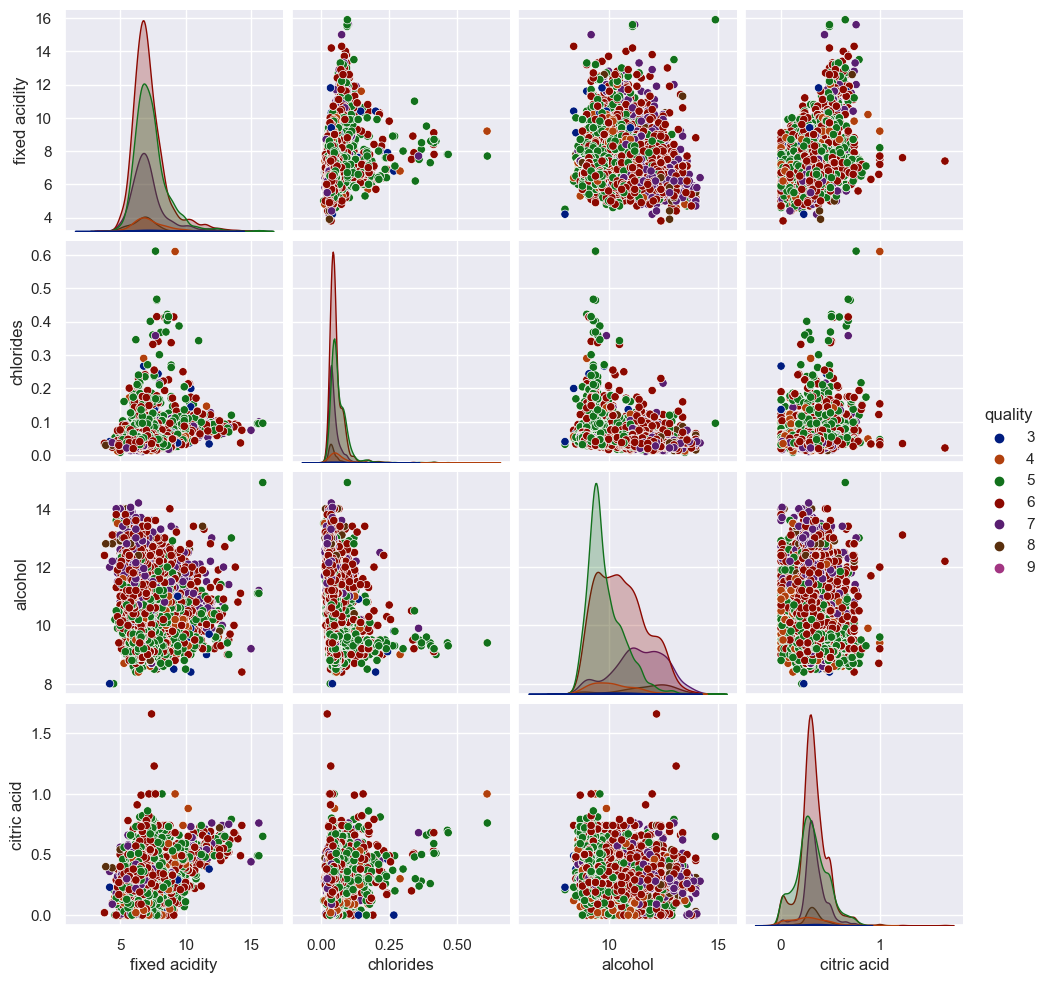

In [50]:
sns.pairplot(total_wine_qcorr , hue = "quality", palette =  'dark' , kind = 'scatter');

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


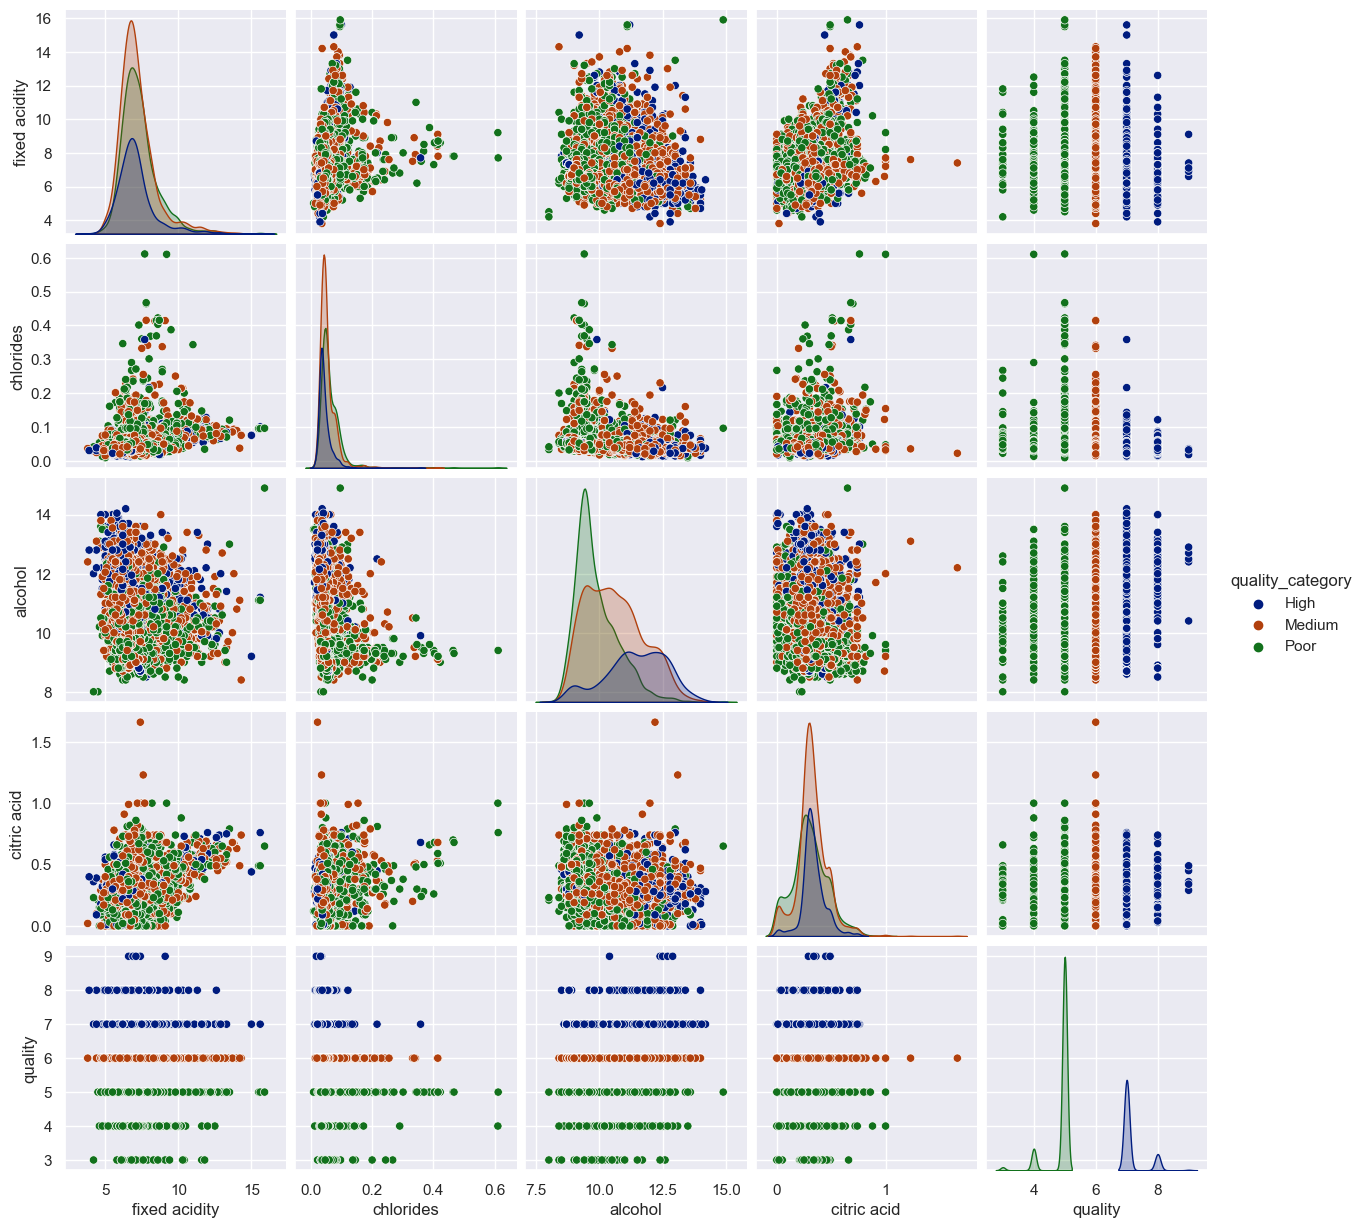

In [51]:
sns.pairplot(total_wine_qcorr,hue = 'quality_category', palette = 'dark', kind = 'scatter');


C:\Users\DELL\AppData\Local\Temp\ipykernel_22940\1410618021.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(total_wine_qcorr.corr(),annot=True,linewidths=5,linecolor='white',vmin=-1,vmax=1)


TypeError: 'str' object is not callable

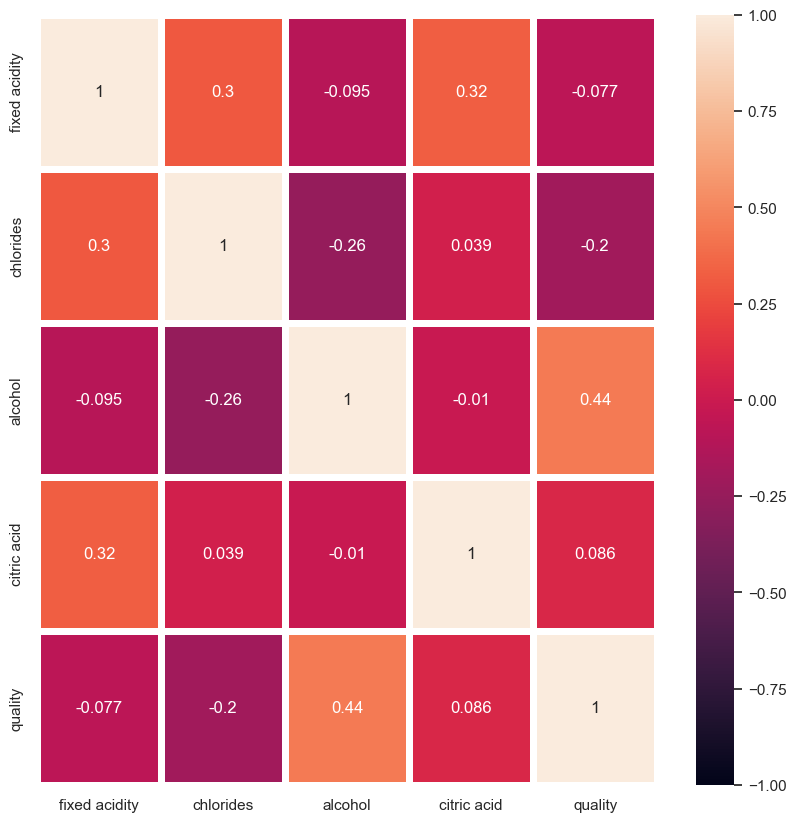

In [53]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(total_wine_qcorr.corr(),annot=True,linewidths=5,linecolor='white',vmin=-1,vmax=1)
sns.set_theme(style='ticks')
plt.title('Mapa de Calor de las variales con mayor correlacion con Quality ')

In [54]:
valores_correlacion = total_wine_qcorr.unstack()
valores_correlacion

fixed acidity     0          7.4
                  1          7.8
                  2          7.8
                  3         11.2
                  4          7.4
                           ...  
quality_category  6492    Medium
                  6493      Poor
                  6494    Medium
                  6495      High
                  6496    Medium
Length: 45479, dtype: object

TypeError: 'str' object is not callable

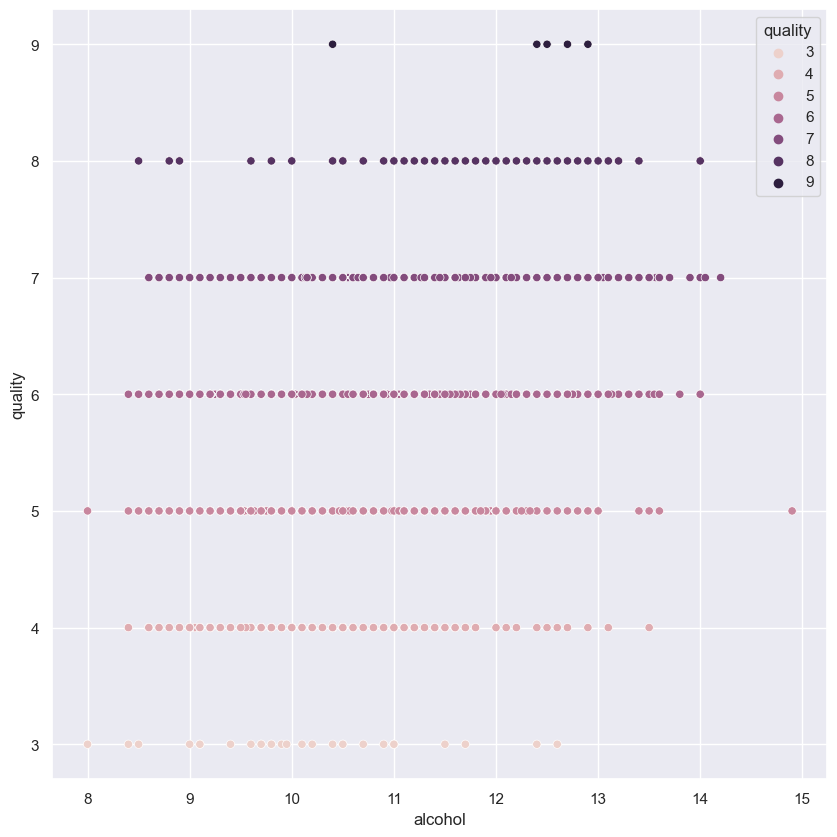

In [55]:
sns.set_theme(style= 'darkgrid')
sns.scatterplot(data = total_wine_qcorr , x = 'alcohol', y = 'quality' , hue = 'quality')
plt.xlabel('alcohol')
plt.ylabel('quality')
plt.title('Correlacion entre calidad y Alcohol')
plt.legend(loc='center',bbox_to_anchor= (1.12 , 0.5))

TypeError: 'str' object is not callable

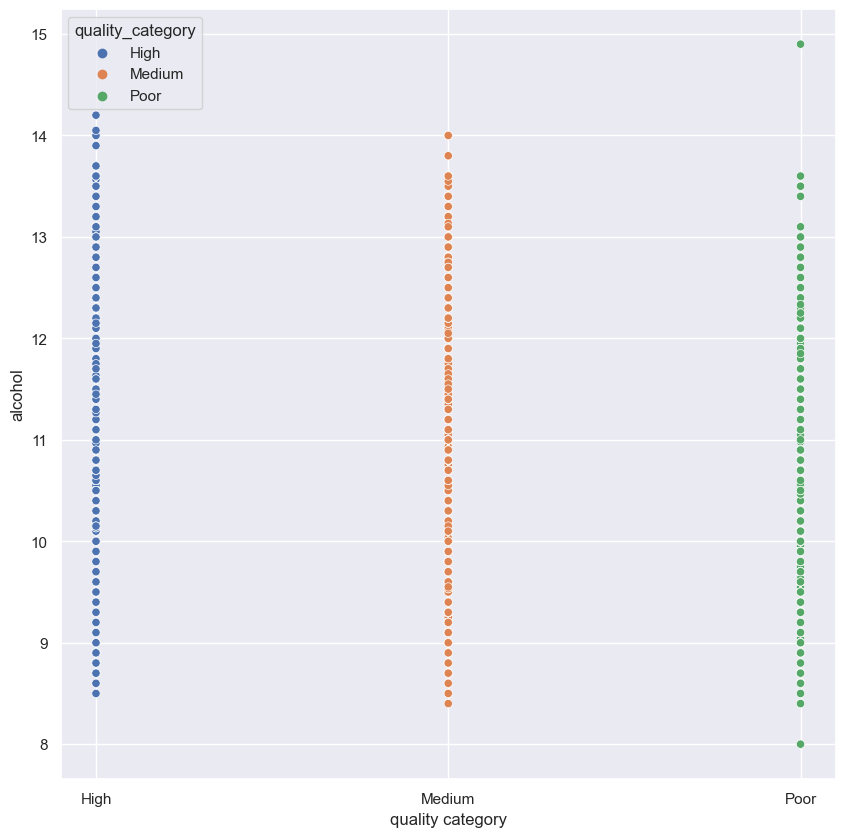

In [56]:
sns.set_theme(style='darkgrid')
sns.scatterplot(data=total_wine_qcorr,x='quality_category',y='alcohol',hue='quality_category')
plt.ylabel('alcohol')
plt.xlabel('quality category')
plt.title('Correlación entre Categoria de Calidad y Alcohol')
plt.legend(loc='center',bbox_to_anchor=(1.12,0.5))

TypeError: 'str' object is not callable

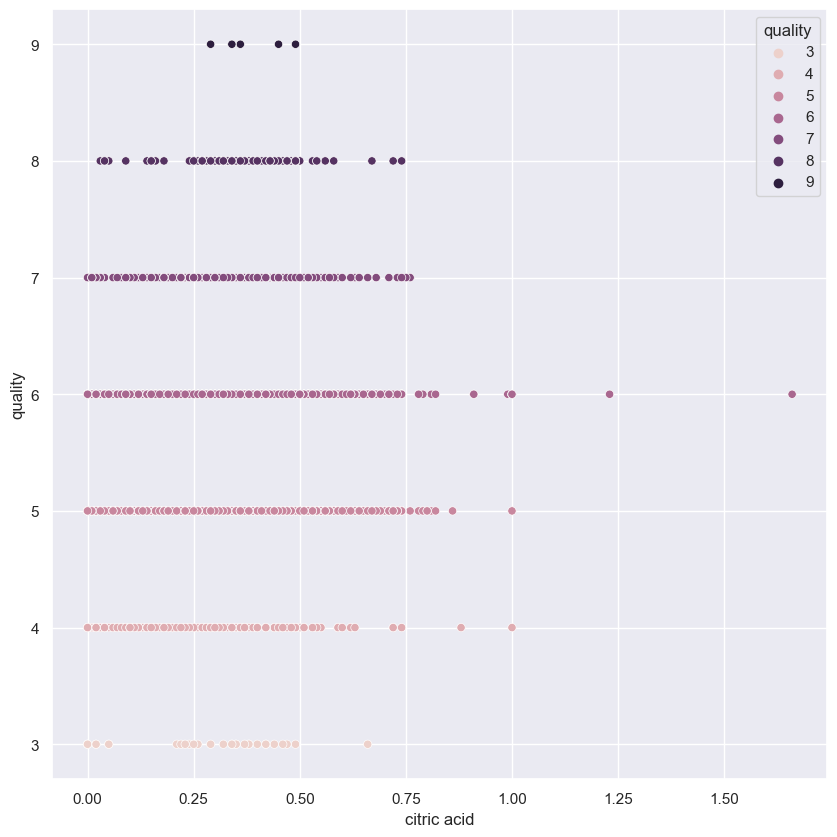

In [57]:
sns.set_theme(style='darkgrid')
sns.scatterplot(data=total_wine_qcorr,x='citric acid',y='quality',hue='quality')
plt.xlabel('citric acid')
plt.ylabel('quality')
plt.title('Correlación entre Calidad y Acido Citrico')
plt.legend(loc='center',bbox_to_anchor=(1.12,0.5))

TypeError: 'str' object is not callable

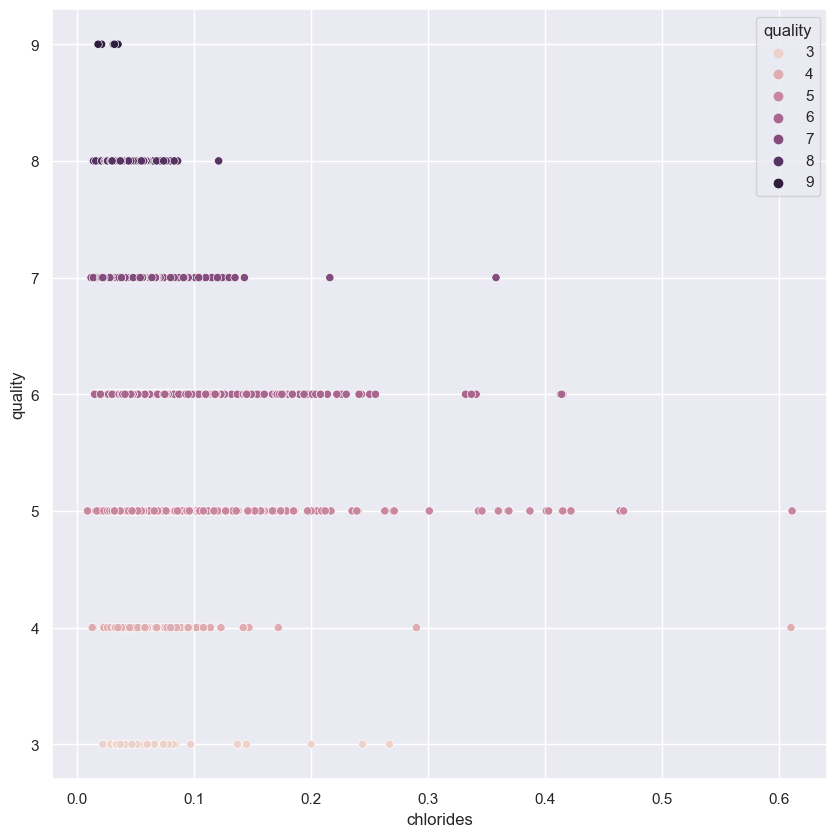

In [58]:
sns.set_theme(style='darkgrid')
sns.scatterplot(data=total_wine_qcorr,x='chlorides',y='quality',hue='quality')
plt.xlabel('chlorides')
plt.ylabel('quality')
plt.title('Correlación entre Calidad y Chlorides')
plt.legend(loc='center',bbox_to_anchor=(1.12,0.5))

# Graficas de Correlaciones Positivas
### Quality Category - Alcohol

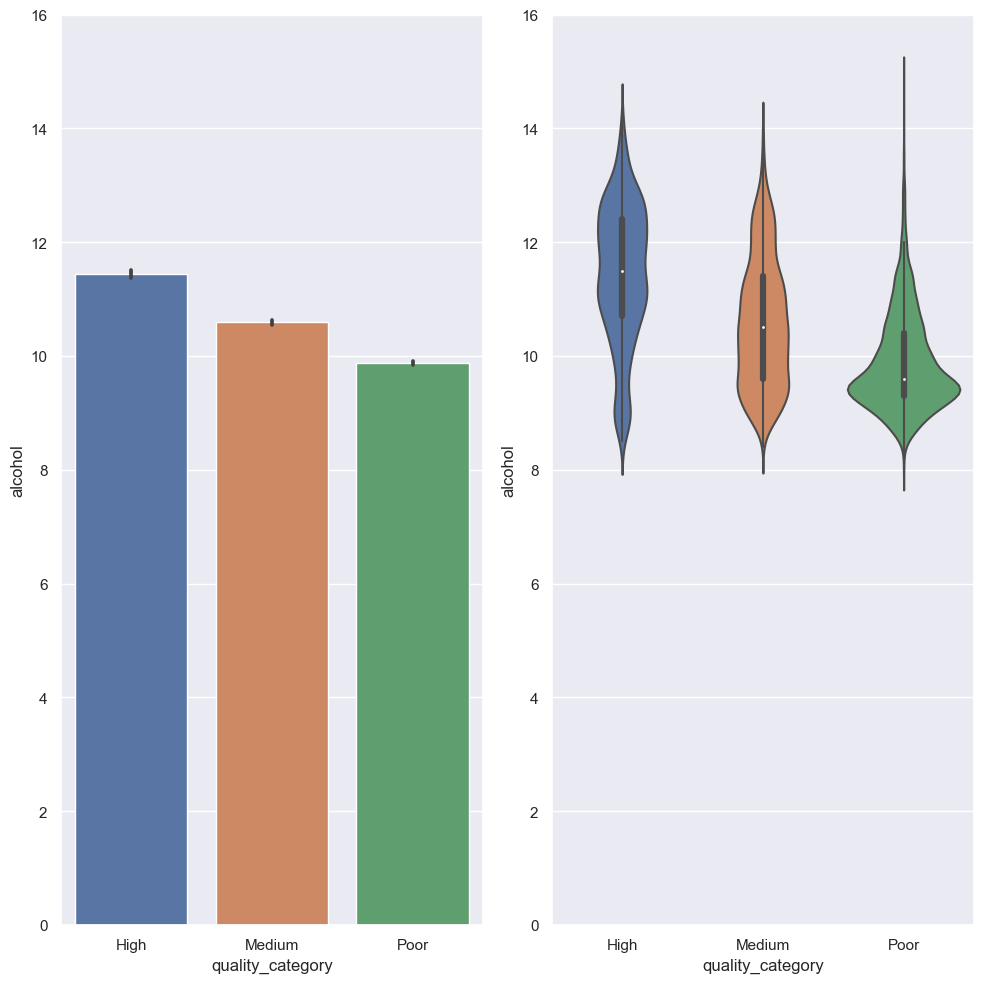

In [59]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2)
sns.barplot(data=total_wine_qcorr, x= 'quality_category', y= 'alcohol',ax = ax1)
ax1.set_ylim(0,16)
sns.violinplot(data=total_wine_qcorr, x= 'quality_category', y= 'alcohol', ax = ax2)
ax2.set_ylim(0,16)
fig.tight_layout()

### Quality Category - Citric Acid

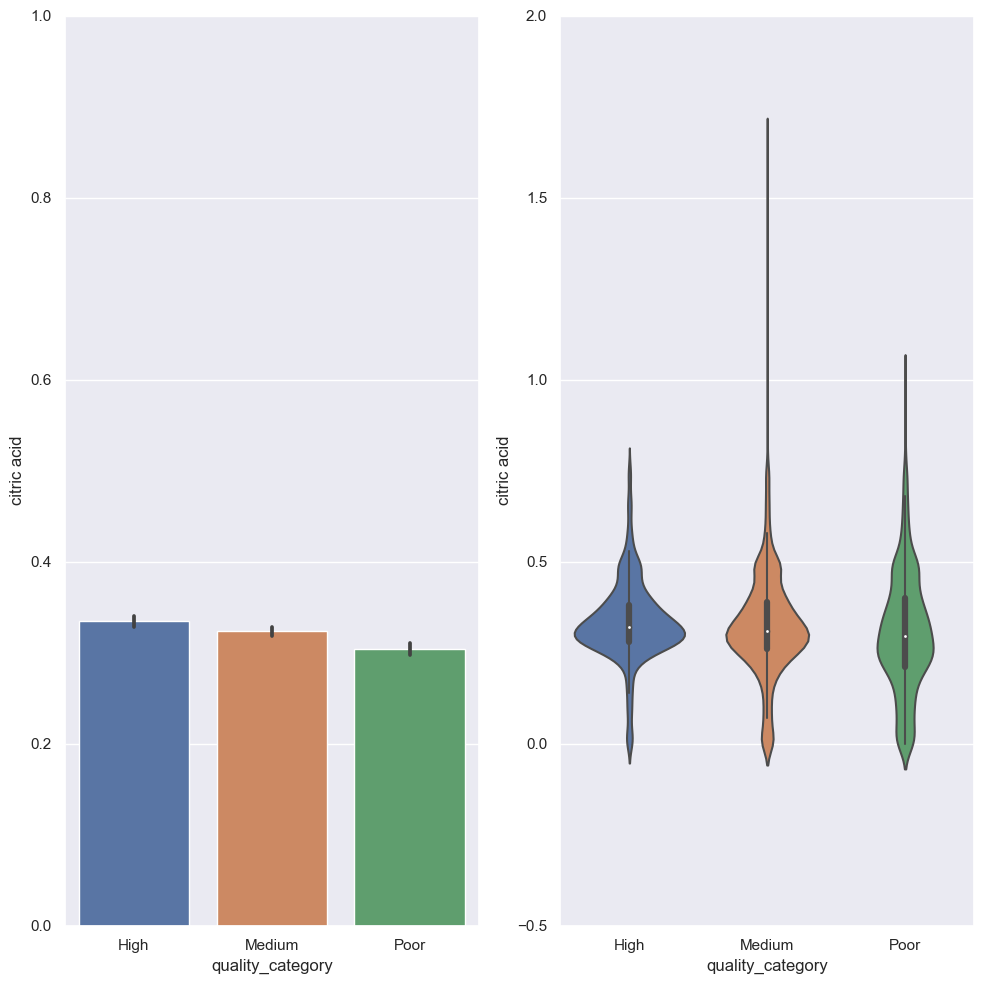

In [60]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2)
sns.barplot(data=total_wine_qcorr, x= 'quality_category', y= 'citric acid', ax = ax1)
ax1.set_ylim(0,1)

sns.violinplot(data=total_wine_qcorr, x= 'quality_category', y= 'citric acid', ax = ax2)
ax2.set_ylim(-0.5,2)
fig.tight_layout()

# Graficas de Correlaciones Negativas
### Quality Category - Chlorides### 

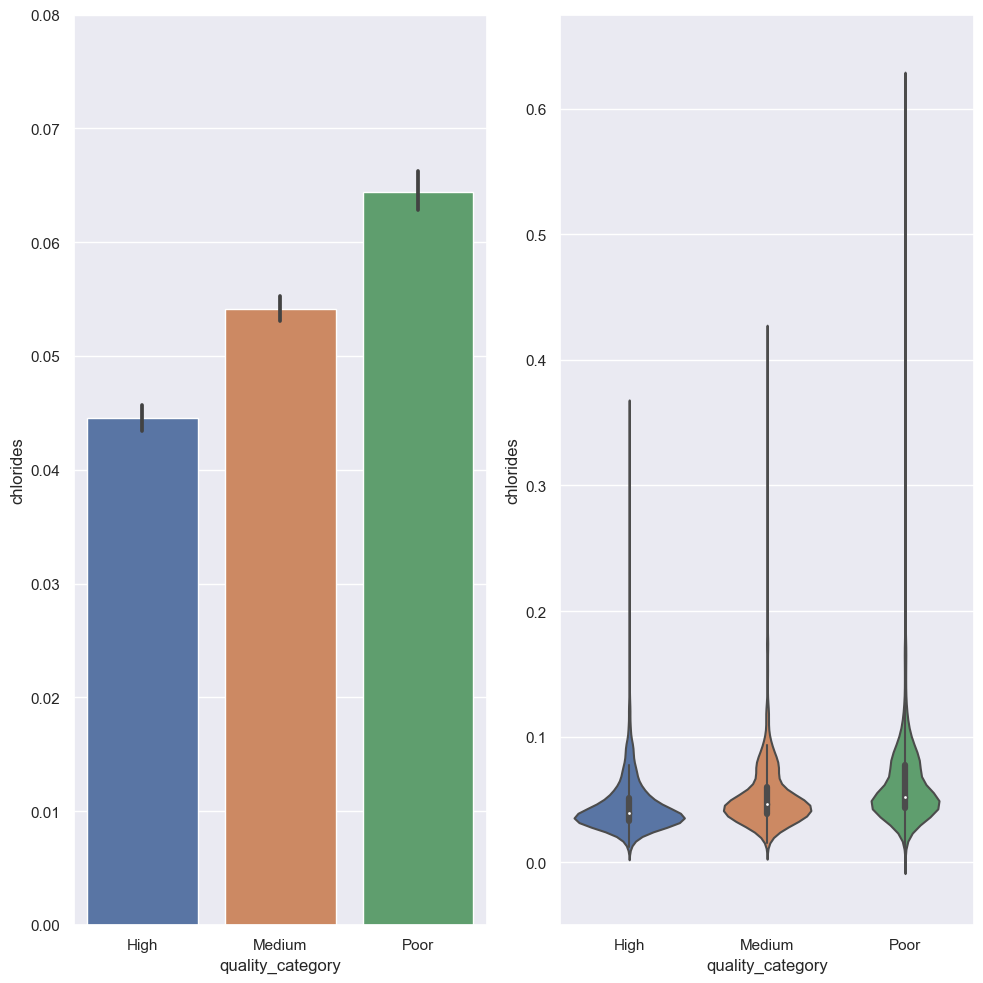

In [61]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2)
sns.barplot(data=total_wine_qcorr, x= 'quality_category', y= 'chlorides', ax = ax1)
ax1.set_ylim(0, 0.08)

sns.violinplot(data=total_wine_qcorr, x= 'quality_category', y= 'chlorides', ax = ax2)
ax2.set_ylim(-0.05, 0.675)
fig.tight_layout()

# Quality Category - Fixed Acidity

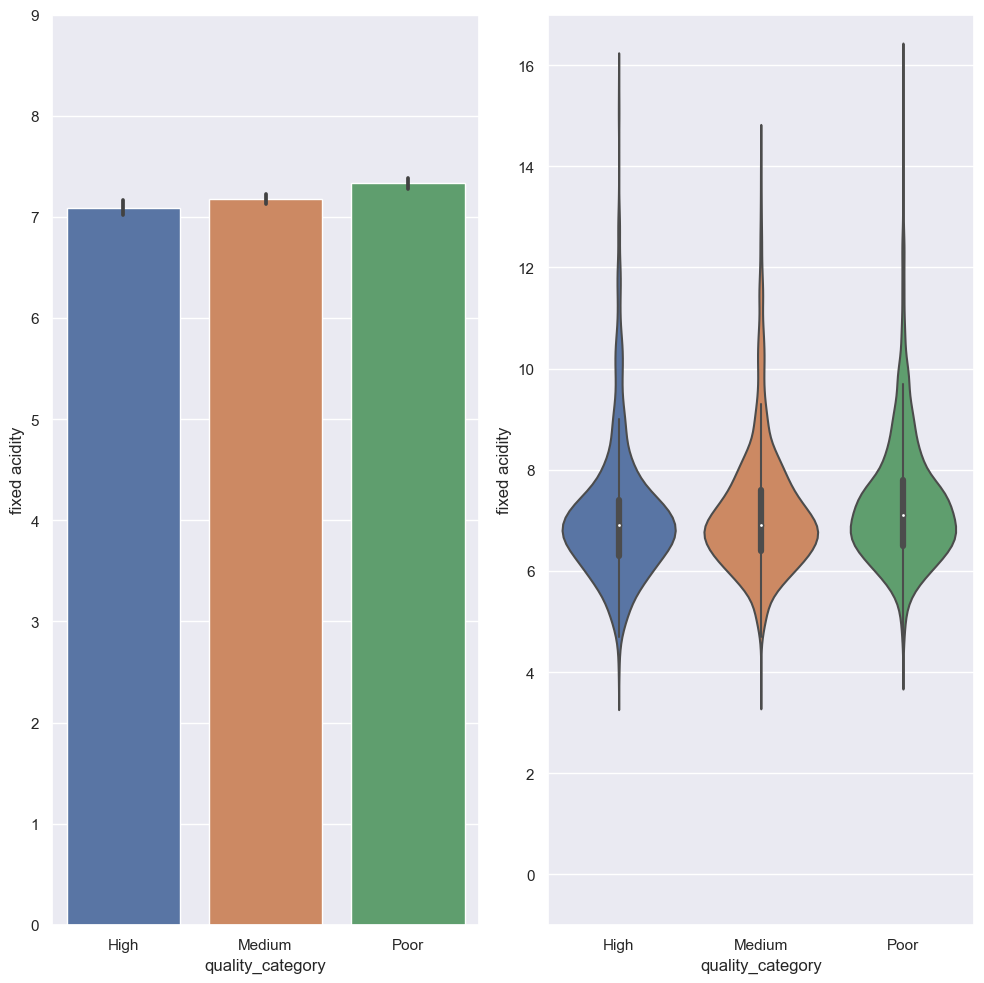

In [62]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2)
sns.barplot(data=total_wine_qcorr, x= 'quality_category', y= 'fixed acidity', ax = ax1)
ax1.set_ylim(0, 9)

sns.violinplot(data=total_wine_qcorr, x= 'quality_category', y= 'fixed acidity', ax = ax2)
ax2.set_ylim(-1, 17)
fig.tight_layout()